## Import Dependencies, Read CSV and Create Dataframes.

In [1]:
#Pandas library to create DataFrames
import pandas as pd
#NumPy library for converting data types
import numpy as np
import matplotlib
matplotlib.__version__
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
load_states = "../state_covid_info/Complete_states.csv"
load_2020 = "../data_frame/Complete_annual_dataframes/Complete_2020.csv"

In [3]:
states_df = pd.read_csv(load_states)
states_df.head()

,State,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
0,AK,"731,545",3/23/2020,3/30/2020,4/24/2020,Red
1,AL,"4,903,185",4/4/2020,4/30/2020,4/30/2020,Red
2,AR,"3,017,804",3/15/2020,3/27/2020,6/5/2020,Red
3,AZ,"7,278,717",4/30/2020,5/15/2020,5/18/2020,Blue
4,CA,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue


In [4]:
#If I set the Index as "State" here, an extra column named "Unammed:0" populates. 
df_2020 = pd.read_csv(load_2020, index_col=[0])
df_2020.head()

,Order Number,Company Name,Ship Date,City,State,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count
0,0,Ecom3,1/2/20,Plantation,FL,33325,UPS,1/1/20,9.9,3.0
1,1,Ecom3,1/2/20,Lafayette,CA,94549,UPS,12/31/19,35.0,10.0
2,2,Ecom3,1/2/20,New York,NY,10022,FEH,1/1/20,29.0,8.0
3,3,Ecom3,1/3/20,New York,NY,10006,FEH,1/2/20,21.5,6.0
4,4,Ecom3,1/2/20,Walkersville,MD,21793,FXG,12/31/19,41.0,12.0


In [5]:
df_2020.State.unique()

array(['FL', 'CA', 'NY', 'MD', 'TX', 'OH', 'NM', 'CT', 'MI', 'WA', 'PA',
       'CO', 'LA', 'HI', 'MA', 'NH', 'NJ', 'TN', 'IN', 'KS', 'NE', 'NC',
       'VA', 'IA', 'MN', 'WI', 'SC', 'SD', 'OR', 'ND', 'WY', 'IL', 'VT',
       'GA', 'AZ', 'DC', 'NV', 'MO', 'ME', 'RI', 'AR', 'AK', 'WV', 'MT',
       'ID', 'OK', 'AL', 'DE', 'MS', 'KY'], dtype=object)

In [6]:
df_2020 = df_2020.set_index("State")
df_2020

,Order Number,Company Name,Ship Date,City,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count
State,,,,,,,,,
FL,0,Ecom3,1/2/20,Plantation,33325,UPS,1/1/20,9.9,3.0
CA,1,Ecom3,1/2/20,Lafayette,94549,UPS,12/31/19,35.0,10.0
NY,2,Ecom3,1/2/20,New York,10022,FEH,1/1/20,29.0,8.0
NY,3,Ecom3,1/3/20,New York,10006,FEH,1/2/20,21.5,6.0
MD,4,Ecom3,1/2/20,Walkersville,21793,FXG,12/31/19,41.0,12.0
...,...,...,...,...,...,...,...,...,...
CO,235998,Winery3,12/29/2020,Aurora,80013,UPS,12/29/2020,21.5,6.0
CA,235999,Winery3,12/29/2020,Napa,94558,GSC,12/29/2020,9.9,3.0
CO,236000,Winery3,12/29/2020,Aurora,80014,UPS,12/29/2020,39.0,12.0


In [7]:
#Join states and 2020 df on "State"
states_2020 = df_2020.join(states_df.set_index ("State"), on = "State")
states_2020.head()

,Order Number,Company Name,Ship Date,City,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
State,,,,,,,,,,,,,,
FL,0,Ecom3,1/2/20,Plantation,33325,UPS,1/1/20,9.9,3.0,"21,477,737",4/1/2020,5/1/2020,9/25/2020,Red
CA,1,Ecom3,1/2/20,Lafayette,94549,UPS,12/31/19,35.0,10.0,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue
NY,2,Ecom3,1/2/20,New York,10022,FEH,1/1/20,29.0,8.0,"19,453,561",3/22/2020,4/6/2020,6/8/2020,Blue
NY,3,Ecom3,1/3/20,New York,10006,FEH,1/2/20,21.5,6.0,"19,453,561",3/22/2020,4/6/2020,6/8/2020,Blue
MD,4,Ecom3,1/2/20,Walkersville,21793,FXG,12/31/19,41.0,12.0,"6,045,680",3/12/2020,3/27/2020,5/13/2020,Blue


In [8]:
#236,003 orders placed in 2020.
states_2020.count()

Order Number                     236003
Company Name                     236003
Ship Date                        236003
City                             236003
Zip                              236003
Shipping Service                 236003
Created Date                     236003
Weight                           236003
Item/Bottle Count                236003
Population                       236003
Lockdown Start                   236003
Initial Expected Lockdown End    236003
Phase 1 Re-Opening Start         236003
Political Alignment              236003
dtype: int64

In [9]:
states_2020.tail(10)

,Order Number,Company Name,Ship Date,City,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
State,,,,,,,,,,,,,,
CA,235993,Winery3,12/21/2020,San Francisco,94109,GSC,12/21/2020,9.9,3.0,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue
NC,235994,Winery3,12/23/2020,Charlotte,28211,UP3,12/23/2020,41.0,12.0,"10,488,084",3/30/2020,4/29/2020,5/20/2020,Red
HI,235995,Winery3,12/28/2020,kamuela,96743,UPS,12/28/2020,21.5,6.0,"1,415,872",3/23/2020,4/30/2020,5/5/2020,Blue
TX,235996,Winery3,12/28/2020,Carrollton,75010,UP2,12/28/2020,21.5,6.0,"28,995,881",3/31/2020,5/4/2020,5/1/2020,Red
FL,235997,Winery3,12/28/2020,Delray Beach,33446,UPS,12/28/2020,21.5,6.0,"21,477,737",4/1/2020,5/1/2020,9/25/2020,Red
CO,235998,Winery3,12/29/2020,Aurora,80013,UPS,12/29/2020,21.5,6.0,"5,758,736",3/26/2020,4/26/2020,4/26/2020,Blue
CA,235999,Winery3,12/29/2020,Napa,94558,GSC,12/29/2020,9.9,3.0,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue
CO,236000,Winery3,12/29/2020,Aurora,80014,UPS,12/29/2020,39.0,12.0,"5,758,736",3/26/2020,4/26/2020,4/26/2020,Blue
VA,236001,Winery3,12/28/2020,Charlottesville,22901,UPS,12/28/2020,21.5,6.0,"8,535,519",3/30/2020,5/15/2020,5/29/2020,Blue


In [10]:
# Calculate the total 2020 Item/Bottle Count.
total_count_2020 = states_2020["Item/Bottle Count"].sum()
total_count_2020

1148819.0

## Slice Each State Into its Own Dataframe and Calculate Total Item/Bottle Count 2020.

In [152]:
# Use .groupby() to find item/bottle count .sum() for each state
total_bottles_by_state_2020 = states_2020.groupby(["State"]).sum()
total_bottles_by_state_2020.head(5)

,Order Number,Weight,Item/Bottle Count
State,,,
AK,40866623,7520.20,2057.0
AL,34554250,7158.95,2024.0
AR,116195242,23049.80,6512.0
AZ,423064503,59063.00,16378.0
CA,2810518961,449803.60,130312.0


In [153]:
#Join states and 2019 df on "State"
states_2020 = total_bottles_by_state_2020.join(states_df.set_index ("State"), on = "State")
states_2020

,Order Number,Weight,Item/Bottle Count,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
State,,,,,,,,
AK,40866623,7520.20,2057.0,"731,545",3/23/2020,3/30/2020,4/24/2020,Red
AL,34554250,7158.95,2024.0,"4,903,185",4/4/2020,4/30/2020,4/30/2020,Red
AR,116195242,23049.80,6512.0,"3,017,804",3/15/2020,3/27/2020,6/5/2020,Red
AZ,423064503,59063.00,16378.0,"7,278,717",4/30/2020,5/15/2020,5/18/2020,Blue
CA,2810518961,449803.60,130312.0,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue
CO,697511052,99811.50,27802.0,"5,758,736",3/26/2020,4/26/2020,4/26/2020,Blue
CT,581341304,86780.75,24062.0,"3,565,287",3/23/2020,4/22/2020,5/20/2020,Blue
DC,193325216,29377.25,8288.0,"705,749",4/1/2020,4/24/2020,5/29/2020,Blue
DE,72724689,5244.20,1289.0,"973,764",3/24/2020,5/8/2020,5/31/2020,Blue


In [12]:
slice_list = ["AL"]
Alabama = states_2020.iloc[states_2020.index.isin(slice_list)]
#Alabama

In [13]:
# Calculate the total Alabama Item/Bottle Count.
Alabama["Item/Bottle Count"].sum()

2024.0

In [14]:
slice_list = ["AK"]
Alaska = states_2020.iloc[states_2020.index.isin(slice_list)]
#Alaska

In [15]:
# Calculate the total Alaska Item/Bottle Count.
Alaska["Item/Bottle Count"].sum()

2057.0

In [16]:
slice_list = ["AZ"]
Arizona = states_2020.iloc[states_2020.index.isin(slice_list)]
#Arizona

In [17]:
# Calculate the total Arizona Item/Bottle Count.
Arizona["Item/Bottle Count"].sum()

16378.0

In [18]:
slice_list = ["AR"]
Arkansas = states_2020.iloc[states_2020.index.isin(slice_list)]
#Arkansas

In [19]:
# Calculate the total Arkansas Item/Bottle Count.
Arkansas["Item/Bottle Count"].sum()

6512.0

In [20]:
slice_list = ["CA"]
California = states_2020.iloc[states_2020.index.isin(slice_list)]
#California

In [21]:
# Calculate the total California Item/Bottle Count.
California["Item/Bottle Count"].sum()

130312.0

In [22]:
slice_list = ["CO"]
Colorado = states_2020.iloc[states_2020.index.isin(slice_list)]
#Colorado

In [23]:
# Calculate the total Alaska Item/Bottle Count.
Colorado["Item/Bottle Count"].sum()

27802.0

In [24]:
slice_list = ["CT"]
Connecticut = states_2020.iloc[states_2020.index.isin(slice_list)]
#Connecticut

In [25]:
# Calculate the total Connecticut Item/Bottle Count.
Connecticut["Item/Bottle Count"].sum()

24062.0

In [26]:
slice_list = ["DC"]
DC = states_2020.iloc[states_2020.index.isin(slice_list)]
#DC

In [27]:
# Calculate the total Connecticut Item/Bottle Count.
DC["Item/Bottle Count"].sum()

8288.0

In [28]:
slice_list = ["DE"]
Delaware = states_2020.iloc[states_2020.index.isin(slice_list)]
#Delaware

In [29]:
# Calculate the total Delaware Item/Bottle Count.
Delaware["Item/Bottle Count"].sum()

1289.0

In [30]:
slice_list = ["FL"]
Florida = states_2020.iloc[states_2020.index.isin(slice_list)]
#Florida

In [31]:
# Calculate the total Florida Item/Bottle Count.
Florida["Item/Bottle Count"].sum()

82961.0

In [32]:
slice_list = ["GA"]
Georgia = states_2020.iloc[states_2020.index.isin(slice_list)]
#Georgia

In [33]:
# Calculate the total Georgia Item/Bottle Count.
Georgia["Item/Bottle Count"].sum()

34693.0

In [34]:
slice_list = ["HI"]
Hawaii = states_2020.iloc[states_2020.index.isin(slice_list)]
#Hawaii

In [35]:
# Calculate the total Hawaii Item/Bottle Count.
Hawaii["Item/Bottle Count"].sum()

9666.0

In [36]:
slice_list = ["ID"]
Idaho = states_2020.iloc[states_2020.index.isin(slice_list)]
#Idaho

In [37]:
# Calculate the total Idaho Item/Bottle Count.
Idaho["Item/Bottle Count"].sum()

3391.0

In [38]:
slice_list = ["IL"]
Illinois = states_2020.iloc[states_2020.index.isin(slice_list)]
#Illinois

In [39]:
# Calculate the total Illinois Item/Bottle Count.
Illinois["Item/Bottle Count"].sum()

51356.0

In [40]:
slice_list = ["IN"]
Indiana = states_2020.iloc[states_2020.index.isin(slice_list)]
#Indiana

In [41]:
# Calculate the total Indiana Item/Bottle Count.
Indiana["Item/Bottle Count"].sum()

17476.0

In [42]:
slice_list = ["IA"]
Iowa = states_2020.iloc[states_2020.index.isin(slice_list)]
#Iowa

In [43]:
# Calculate the total Iowa Item/Bottle Count.
Iowa["Item/Bottle Count"].sum()

5846.0

In [44]:
slice_list = ["KS"]
Kansas = states_2020.iloc[states_2020.index.isin(slice_list)]
#Kansas

In [45]:
# Calculate the total Kansas Item/Bottle Count.
Kansas["Item/Bottle Count"].sum()

7165.0

In [46]:
#Effective March 12, 2021, brand registration is not required for DTC products.  DTC shipping previously prohibited. 
slice_list = ["KY"]
Kentucky = states_2020.iloc[states_2020.index.isin(slice_list)]
#Kentucky

In [47]:
# Calculate the total Kentucky Item/Bottle Count.
Kentucky["Item/Bottle Count"].sum()

40.0

In [48]:
slice_list = ["LA"]
Louisiana = states_2020.iloc[states_2020.index.isin(slice_list)]
#Louisiana

In [49]:
# Calculate the total Louisiana Item/Bottle Count.
Louisiana["Item/Bottle Count"].sum()

10558.0

In [50]:
slice_list = ["ME"]
Maine = states_2020.iloc[states_2020.index.isin(slice_list)]
#Maine

In [51]:
# Calculate the total Maine Item/Bottle Count.
Maine["Item/Bottle Count"].sum()

5007.0

In [52]:
slice_list = ["MD"]
Maryland = states_2020.iloc[states_2020.index.isin(slice_list)]
#Maryland

In [53]:
# Calculate the total Maryland Item/Bottle Count.
Maryland["Item/Bottle Count"].sum()

29515.0

In [54]:
slice_list = ["MA"]
Massachusetts = states_2020.iloc[states_2020.index.isin(slice_list)]
#Massachusetts

In [55]:
# Calculate the total Massachusetts Item/Bottle Count.
Massachusetts["Item/Bottle Count"].sum()

43665.0

In [56]:
slice_list = ["MI"]
Michigan = states_2020.iloc[states_2020.index.isin(slice_list)]
#Michigan

In [57]:
# Calculate the total Michigan Item/Bottle Count.
Michigan["Item/Bottle Count"].sum()

36218.0

In [58]:
slice_list = ["MN"]
Minnesota = states_2020.iloc[states_2020.index.isin(slice_list)]
#Minnesota

In [59]:
# Calculate the total Minnesota Item/Bottle Count.
Minnesota["Item/Bottle Count"].sum()

15040.0

In [60]:
#DTC shipping prohibited in Mississippi. This order was sent to Philedelphia, MS (A real place!) and likely
#bypassed the checks/balances that are in place to adhere to shipping laws. 
slice_list = ["MS"]
Mississippi = states_2020.iloc[states_2020.index.isin(slice_list)]
#Mississippi

In [61]:
# Calculate the total Mississippi Item/Bottle Count.
Mississippi["Item/Bottle Count"].sum()

6.0

In [62]:
slice_list = ["MO"]
Missouri = states_2020.iloc[states_2020.index.isin(slice_list)]
#Missouri

In [63]:
# Calculate the total Missouri Item/Bottle Count.
Missouri["Item/Bottle Count"].sum()

13633.0

In [64]:
slice_list = ["MT"]
Montana = states_2020.iloc[states_2020.index.isin(slice_list)]
#Montana

In [65]:
# Calculate the total Montana Item/Bottle Count.
Montana["Item/Bottle Count"].sum()

2472.0

In [66]:
#No shipping law information- No orders for Nebraska
slice_list = ["NE"]
Nebraska = states_2020.iloc[states_2020.index.isin(slice_list)]
#Nebraska

In [67]:
# Calculate the total Nebraska Item/Bottle Count.
Nebraska["Item/Bottle Count"].sum()

4753.0

In [68]:
slice_list = ["NV"]
Nevada = states_2020.iloc[states_2020.index.isin(slice_list)]
#Nevada

In [69]:
# Calculate the total Nevada Item/Bottle Count.
Nevada["Item/Bottle Count"].sum()

6802.0

In [70]:
slice_list = ["NH"]
New_Hampshire = states_2020.iloc[states_2020.index.isin(slice_list)]
#New_Hampshire

In [71]:
# Calculate the total New_Hampshire Item/Bottle Count.
New_Hampshire["Item/Bottle Count"].sum()

6015.0

In [72]:
slice_list = ["NJ"]
New_Jersey = states_2020.iloc[states_2020.index.isin(slice_list)]
#New_Jersey

In [73]:
# Calculate the total New Jersey Item/Bottle Count.
New_Jersey["Item/Bottle Count"].sum()

61171.0

In [74]:
slice_list = ["NM"]
New_Mexico = states_2020.iloc[states_2020.index.isin(slice_list)]
#New_Mexico

In [75]:
# Calculate the total New Mexico Item/Bottle Count.
New_Mexico["Item/Bottle Count"].sum()

4487.0

In [76]:
slice_list = ["NY"]
New_York = states_2020.iloc[states_2020.index.isin(slice_list)]
#New_York

In [77]:
# Calculate the total New York Item/Bottle Count.
New_York["Item/Bottle Count"].sum()

119653.0

In [78]:
slice_list = ["NC"]
North_Carolina = states_2020.iloc[states_2020.index.isin(slice_list)]
#North_Carolina

In [79]:
# Calculate the total North Carolina Item/Bottle Count.
North_Carolina["Item/Bottle Count"].sum()

28220.0

In [80]:
slice_list = ["ND"]
North_Dakota = states_2020.iloc[states_2020.index.isin(slice_list)]
#North_Dakota

In [81]:
# Calculate the total North Dakota Item/Bottle Count.
North_Dakota["Item/Bottle Count"].sum()

2042.0

In [82]:
slice_list = ["OH"]
Ohio = states_2020.iloc[states_2020.index.isin(slice_list)]
#Ohio

In [83]:
# Calculate the total Ohio Item/Bottle Count.
Ohio["Item/Bottle Count"].sum()

36798.0

In [84]:
slice_list = ["OK"]
Oklahoma = states_2020.iloc[states_2020.index.isin(slice_list)]
#Oklahoma

In [85]:
# Calculate the total Oklahoma Item/Bottle Count.
Oklahoma["Item/Bottle Count"].sum()

4694.0

In [86]:
slice_list = ["OR"]
Oregon = states_2020.iloc[states_2020.index.isin(slice_list)]
#Oregon

In [87]:
# Calculate the total Oregon Item/Bottle Count.
Oregon["Item/Bottle Count"].sum()

11952.0

In [88]:
slice_list = ["PA"]
Pennsylvania = states_2020.iloc[states_2020.index.isin(slice_list)]
#Pennsylvania

In [89]:
# Calculate the total Pennsylvania Item/Bottle Count.
Pennsylvania["Item/Bottle Count"].sum()

82215.0

In [90]:
slice_list = ["RI"]
Rhode_Island = states_2020.iloc[states_2020.index.isin(slice_list)]
#Rhode_Island

In [91]:
# Calculate the total Rhode Island Item/Bottle Count.
Rhode_Island["Item/Bottle Count"].sum()

7767.0

In [92]:
slice_list = ["SC"]
South_Carolina = states_2020.iloc[states_2020.index.isin(slice_list)]
#South_Carolina

In [93]:
# Calculate the total Oregon Item/Bottle Count.
South_Carolina["Item/Bottle Count"].sum()

14478.0

In [94]:
slice_list = ["SD"]
South_Dakota = states_2020.iloc[states_2020.index.isin(slice_list)]
#South_Dakota

In [95]:
# Calculate the total South_Dakota Item/Bottle Count.
South_Dakota["Item/Bottle Count"].sum()

1757.0

In [96]:
slice_list = ["TN"]
Tennessee = states_2020.iloc[states_2020.index.isin(slice_list)]
#Tennessee

In [97]:
# Calculate the total Tennessee Item/Bottle Count.
Tennessee["Item/Bottle Count"].sum()

20300.0

In [98]:
slice_list = ["TX"]
Texas = states_2020.iloc[states_2020.index.isin(slice_list)]
#Texas

In [99]:
# Calculate the total Texas Item/Bottle Count.
Texas["Item/Bottle Count"].sum()

66704.0

In [100]:
#No orders from Utah. DTC shipping prohibited.
slice_list = ["UT"]
Utah = states_2020.iloc[states_2020.index.isin(slice_list)]
#Utah

In [101]:
# Calculate the total Utah Item/Bottle Count.
Utah["Item/Bottle Count"].sum()

0.0

In [102]:
slice_list = ["VT"]
Vermont = states_2020.iloc[states_2020.index.isin(slice_list)]
#Vermont

In [103]:
# Calculate the total Vermont Item/Bottle Count.
Vermont["Item/Bottle Count"].sum()

3703.0

In [104]:
slice_list = ["VA"]
Virginia = states_2020.iloc[states_2020.index.isin(slice_list)]
#Virginia

In [105]:
# Calculate the total Virginia Item/Bottle Count.
Virginia["Item/Bottle Count"].sum()

40075.0

In [106]:
slice_list = ["WA"]
Washington = states_2020.iloc[states_2020.index.isin(slice_list)]
#Washington

In [107]:
# Calculate the total Washington Item/Bottle Count.
Washington["Item/Bottle Count"].sum()

19176.0

In [108]:
slice_list = ["WV"]
West_Virginia = states_2020.iloc[states_2020.index.isin(slice_list)]
#West_Virginia

In [109]:
# Calculate the total West Virginia Item/Bottle Count.
West_Virginia["Item/Bottle Count"].sum()

2869.0

In [110]:
slice_list = ["WI"]
Wisconsin = states_2020.iloc[states_2020.index.isin(slice_list)]
#Wisconsin

In [111]:
# Calculate the total Wisconsin Item/Bottle Count.
Wisconsin["Item/Bottle Count"].sum()

13768.0

In [112]:
slice_list = ["WY"]
Wyoming = states_2020.iloc[states_2020.index.isin(slice_list)]
#Wyoming

In [113]:
# Calculate the total Wyoming Item/Bottle Count.
Wyoming["Item/Bottle Count"].sum()

1988.0

In [114]:
#Average order size
Wyoming["Item/Bottle Count"].mean()

5.4316939890710385

## Red vs Blue

In [115]:
#Create a df with only orders created in red states.
red_states_2020= states_2020[states_2020['Political Alignment'] == 'Red']
red_states_2020.head()

,Order Number,Company Name,Ship Date,City,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
State,,,,,,,,,,,,,,
FL,0,Ecom3,1/2/20,Plantation,33325,UPS,1/1/20,9.9,3.0,"21,477,737",4/1/2020,5/1/2020,9/25/2020,Red
TX,6,Ecom3,1/2/20,Dallas,75225,UPS,1/1/20,21.5,6.0,"28,995,881",3/31/2020,5/4/2020,5/1/2020,Red
FL,8,Ecom3,1/2/20,Estero,34135-8211,UPS,1/1/20,21.5,6.0,"21,477,737",4/1/2020,5/1/2020,9/25/2020,Red
OH,12,Ecom3,1/2/20,Powell,43065,UPS,1/1/20,21.5,6.0,"11,689,100",3/23/2020,5/19/2020,5/19/2020,Red
OH,17,Ecom3,1/3/20,Marysville,43040,UPS,1/2/20,18.5,5.0,"11,689,100",3/23/2020,5/19/2020,5/19/2020,Red


In [116]:
#Check that red_states_2020 is all "Red"
red_states_2020["Political Alignment"].unique()

array(['Red'], dtype=object)

In [117]:
new_red_states_2020 = red_states_2020.reset_index()
new_red_states_2020

,State,Order Number,Company Name,Ship Date,City,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
0,FL,0,Ecom3,1/2/20,Plantation,33325,UPS,1/1/20,9.9,3.0,"21,477,737",4/1/2020,5/1/2020,9/25/2020,Red
1,TX,6,Ecom3,1/2/20,Dallas,75225,UPS,1/1/20,21.5,6.0,"28,995,881",3/31/2020,5/4/2020,5/1/2020,Red
2,FL,8,Ecom3,1/2/20,Estero,34135-8211,UPS,1/1/20,21.5,6.0,"21,477,737",4/1/2020,5/1/2020,9/25/2020,Red
3,OH,12,Ecom3,1/2/20,Powell,43065,UPS,1/1/20,21.5,6.0,"11,689,100",3/23/2020,5/19/2020,5/19/2020,Red
4,OH,17,Ecom3,1/3/20,Marysville,43040,UPS,1/2/20,18.5,5.0,"11,689,100",3/23/2020,5/19/2020,5/19/2020,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71149,LA,235989,Winery3,12/21/2020,Baton Rouge,70808,FEX,12/21/2020,24.0,7.0,"4,648,794",3/23/2020,4/13/2020,5/15/2020,Red
71150,TX,235992,Winery3,12/22/2020,Dallas,75248,UPS,12/22/2020,21.5,6.0,"28,995,881",3/31/2020,5/4/2020,5/1/2020,Red
71151,NC,235994,Winery3,12/23/2020,Charlotte,28211,UP3,12/23/2020,41.0,12.0,"10,488,084",3/30/2020,4/29/2020,5/20/2020,Red
71152,TX,235996,Winery3,12/28/2020,Carrollton,75010,UP2,12/28/2020,21.5,6.0,"28,995,881",3/31/2020,5/4/2020,5/1/2020,Red


In [118]:
#Generate summary statistics for red_states_2020
red_summary_statistics_2020 = red_states_2020.describe()
red_summary_statistics_2020

,Order Number,Weight,Item/Bottle Count
count,71154.000000,71154.000000,71154.000000
mean,119471.213523,17.233945,4.760716
std,68850.686877,10.990909,3.457681
min,0.000000,1.850000,1.000000
25%,59918.500000,7.000000,2.000000
50%,120543.500000,14.000000,4.000000
75%,178330.750000,21.500000,6.000000
max,235997.000000,48.000000,24.000000


In [119]:
# Calculate the total 2020 Item/Bottle Count for Red States.
total_red_count_2020 = red_states_2020["Item/Bottle Count"].sum()
total_red_count_2020

338744.0

In [120]:
new_red_states_2020.State.unique()

array(['FL', 'TX', 'OH', 'LA', 'TN', 'IN', 'KS', 'NE', 'NC', 'IA', 'SC',
       'SD', 'ND', 'WY', 'MO', 'AR', 'AK', 'WV', 'MT', 'ID', 'OK', 'AL',
       'MS', 'KY'], dtype=object)

In [121]:
# Adding a list of values with keys to create a new DataFrame for Red states only.
R = {'Red State': ['Alabama', 'Alaska', 'Arkansas', 'Florida', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
               'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'North Carolina', 'North Dakota',
               'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'West Virginia', 'Wyoming',  
                ],
     'Total Item/Bottle Count': [Alabama["Item/Bottle Count"].sum(), 
            Alaska["Item/Bottle Count"].sum(),  
            Arkansas["Item/Bottle Count"].sum(), 
            Florida["Item/Bottle Count"].sum(),
            Idaho["Item/Bottle Count"].sum(),
            Indiana["Item/Bottle Count"].sum(),
            Iowa["Item/Bottle Count"].sum(),
            Kansas["Item/Bottle Count"].sum(),
            Kentucky["Item/Bottle Count"].sum(),
            Louisiana["Item/Bottle Count"].sum(),
            Mississippi["Item/Bottle Count"].sum(),
            Missouri["Item/Bottle Count"].sum(),
            Montana["Item/Bottle Count"].sum(),
            Nebraska["Item/Bottle Count"].sum(),
            North_Carolina["Item/Bottle Count"].sum(),
            North_Dakota["Item/Bottle Count"].sum(),
            Ohio["Item/Bottle Count"].sum(),
            Oklahoma["Item/Bottle Count"].sum(),
            South_Carolina["Item/Bottle Count"].sum(),
            South_Dakota["Item/Bottle Count"].sum(),
            Tennessee["Item/Bottle Count"].sum(),
            Texas["Item/Bottle Count"].sum(),
            West_Virginia["Item/Bottle Count"].sum(),
            Wyoming["Item/Bottle Count"].sum()]}

In [122]:
total_bottle_count_by_red_state = pd.DataFrame.from_dict(data=R)
total_bottle_count_by_red_state

,Red State,Total Item/Bottle Count
0,Alabama,2024.0
1,Alaska,2057.0
2,Arkansas,6512.0
3,Florida,82961.0
4,Idaho,3391.0
5,Indiana,17476.0
6,Iowa,5846.0
7,Kansas,7165.0
8,Kentucky,40.0
9,Louisiana,10558.0


In [123]:
#Print the highest bottle count by red state
print(total_bottle_count_by_red_state[total_bottle_count_by_red_state["Total Item/Bottle Count"] == 
                                  total_bottle_count_by_red_state["Total Item/Bottle Count"].max()])

  Red State  Total Item/Bottle Count
3   Florida                  82961.0


In [124]:
#Print the lowest bottle count by red state
print(total_bottle_count_by_red_state[total_bottle_count_by_red_state["Total Item/Bottle Count"] == 
                                  total_bottle_count_by_red_state["Total Item/Bottle Count"].min()])

      Red State  Total Item/Bottle Count
10  Mississippi                      6.0


In [125]:
#Export total_bottle_count_by_red_state to .csv
total_bottle_count_by_red_state.to_csv('Resources/2020_total_bottle_count_by_red_state.csv') 

In [126]:
#Create a df with only orders created in blue states.
blue_states_2020= states_2020[states_2020['Political Alignment'] == 'Blue']
blue_states_2020.head()

,Order Number,Company Name,Ship Date,City,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
State,,,,,,,,,,,,,,
CA,1,Ecom3,1/2/20,Lafayette,94549,UPS,12/31/19,35.0,10.0,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue
NY,2,Ecom3,1/2/20,New York,10022,FEH,1/1/20,29.0,8.0,"19,453,561",3/22/2020,4/6/2020,6/8/2020,Blue
NY,3,Ecom3,1/3/20,New York,10006,FEH,1/2/20,21.5,6.0,"19,453,561",3/22/2020,4/6/2020,6/8/2020,Blue
MD,4,Ecom3,1/2/20,Walkersville,21793,FXG,12/31/19,41.0,12.0,"6,045,680",3/12/2020,3/27/2020,5/13/2020,Blue
NY,5,Ecom3,1/3/20,Clarence,14031,FEH,1/2/20,21.5,6.0,"19,453,561",3/22/2020,4/6/2020,6/8/2020,Blue


In [127]:
#Check that blue_states_2020 is all "Blue"
blue_states_2020["Political Alignment"].unique()

array(['Blue'], dtype=object)

In [128]:
new_blue_states_2020 = blue_states_2020.reset_index()
new_blue_states_2020

,State,Order Number,Company Name,Ship Date,City,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
0,CA,1,Ecom3,1/2/20,Lafayette,94549,UPS,12/31/19,35.0,10.0,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue
1,NY,2,Ecom3,1/2/20,New York,10022,FEH,1/1/20,29.0,8.0,"19,453,561",3/22/2020,4/6/2020,6/8/2020,Blue
2,NY,3,Ecom3,1/3/20,New York,10006,FEH,1/2/20,21.5,6.0,"19,453,561",3/22/2020,4/6/2020,6/8/2020,Blue
3,MD,4,Ecom3,1/2/20,Walkersville,21793,FXG,12/31/19,41.0,12.0,"6,045,680",3/12/2020,3/27/2020,5/13/2020,Blue
4,NY,5,Ecom3,1/3/20,Clarence,14031,FEH,1/2/20,21.5,6.0,"19,453,561",3/22/2020,4/6/2020,6/8/2020,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164844,CO,235998,Winery3,12/29/2020,Aurora,80013,UPS,12/29/2020,21.5,6.0,"5,758,736",3/26/2020,4/26/2020,4/26/2020,Blue
164845,CA,235999,Winery3,12/29/2020,Napa,94558,GSC,12/29/2020,9.9,3.0,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue
164846,CO,236000,Winery3,12/29/2020,Aurora,80014,UPS,12/29/2020,39.0,12.0,"5,758,736",3/26/2020,4/26/2020,4/26/2020,Blue
164847,VA,236001,Winery3,12/28/2020,Charlottesville,22901,UPS,12/28/2020,21.5,6.0,"8,535,519",3/30/2020,5/15/2020,5/29/2020,Blue


In [129]:
new_blue_states_2020.State.unique()

array(['CA', 'NY', 'MD', 'NM', 'CT', 'MI', 'WA', 'PA', 'CO', 'HI', 'MA',
       'NH', 'NJ', 'VA', 'MN', 'WI', 'OR', 'IL', 'VT', 'GA', 'AZ', 'DC',
       'NV', 'ME', 'RI', 'DE'], dtype=object)

In [130]:
# Adding a list of values with keys to create a new DataFrame for Blue states only.
B = {'Blue State': ['Arizona', 'California', 'Colordao', 'Connecticut', 'District of Columbia', 'Delaware', 'Georgia',
               'Hawaii', 'Illinois', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Nevada',
               'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'Oregon', 'Pennsylvania', 'Rhode Island',
               'Vermont', 'Virginia', 'Washington',  'Wisconsin',
              ],
       'Total Item/Bottle Count': [Arizona["Item/Bottle Count"].sum(),    
            California["Item/Bottle Count"].sum(),
            Colorado["Item/Bottle Count"].sum(),
            Connecticut["Item/Bottle Count"].sum(),
            DC["Item/Bottle Count"].sum(),
            Delaware["Item/Bottle Count"].sum(),
            Georgia["Item/Bottle Count"].sum(),
            Hawaii["Item/Bottle Count"].sum(),
            Illinois["Item/Bottle Count"].sum(),
            Maine["Item/Bottle Count"].sum(),
            Maryland["Item/Bottle Count"].sum(),
            Massachusetts["Item/Bottle Count"].sum(),
            Michigan["Item/Bottle Count"].sum(),
            Minnesota["Item/Bottle Count"].sum(),
            Nevada["Item/Bottle Count"].sum(),
            New_Hampshire["Item/Bottle Count"].sum(),
            New_Jersey["Item/Bottle Count"].sum(),
            New_Mexico["Item/Bottle Count"].sum(),
            New_York["Item/Bottle Count"].sum(),
            Oregon["Item/Bottle Count"].sum(),
            Pennsylvania["Item/Bottle Count"].sum(),
            Rhode_Island["Item/Bottle Count"].sum(),
            Vermont["Item/Bottle Count"].sum(),
            Virginia["Item/Bottle Count"].sum(),
            Washington["Item/Bottle Count"].sum(),
            Wisconsin["Item/Bottle Count"].sum()]}

In [131]:
total_bottle_count_by_blue_state = pd.DataFrame.from_dict(data=B)
total_bottle_count_by_blue_state

,Blue State,Total Item/Bottle Count
0,Arizona,16378.0
1,California,130312.0
2,Colordao,27802.0
3,Connecticut,24062.0
4,District of Columbia,8288.0
5,Delaware,1289.0
6,Georgia,34693.0
7,Hawaii,9666.0
8,Illinois,51356.0
9,Maine,5007.0


In [132]:
#Generate summary statistics for blue_states_2020
blue_summary_statistics_2020 = blue_states_2020.describe()
blue_summary_statistics_2020

,Order Number,Weight,Item/Bottle Count
count,164849.000000,164849.000000,164849.000000
mean,117366.409720,17.539310,4.914043
std,67804.539441,16.774859,11.282404
min,1.000000,1.000000,0.000000
25%,58568.000000,7.000000,2.000000
50%,116872.000000,14.000000,4.000000
75%,176317.000000,21.500000,6.000000
max,236002.000000,2057.000000,2272.000000


In [133]:
# Calculate the total 2020 Item/Bottle Count for Blue States.
total_blue_count_2020 = blue_states_2020["Item/Bottle Count"].sum()
total_blue_count_2020

810075.0

In [134]:
#Print the highest bottle count by blue state
print(total_bottle_count_by_blue_state[total_bottle_count_by_blue_state["Total Item/Bottle Count"] == 
                                  total_bottle_count_by_blue_state["Total Item/Bottle Count"].max()])

   Blue State  Total Item/Bottle Count
1  California                 130312.0


In [135]:
#Print the lowest bottle count by blue state
print(total_bottle_count_by_blue_state[total_bottle_count_by_blue_state["Total Item/Bottle Count"] == 
                                  total_bottle_count_by_blue_state["Total Item/Bottle Count"].min()])

  Blue State  Total Item/Bottle Count
5   Delaware                   1289.0


In [136]:
#Export total_bottle_count_by_blue_state to .csv
total_bottle_count_by_blue_state.to_csv('Resources/2020_total_bottle_count_by_blue_state.csv') 

In [137]:
#Create a joined df with all of red states and all of blue states.
joined_blueandred = total_bottle_count_by_blue_state.join(total_bottle_count_by_red_state, 
                                                          lsuffix='_Blue', rsuffix='_Red')
joined_blueandred

,Blue State,Total Item/Bottle Count_Blue,Red State,Total Item/Bottle Count_Red
0,Arizona,16378.0,Alabama,2024.0
1,California,130312.0,Alaska,2057.0
2,Colordao,27802.0,Arkansas,6512.0
3,Connecticut,24062.0,Florida,82961.0
4,District of Columbia,8288.0,Idaho,3391.0
5,Delaware,1289.0,Indiana,17476.0
6,Georgia,34693.0,Iowa,5846.0
7,Hawaii,9666.0,Kansas,7165.0
8,Illinois,51356.0,Kentucky,40.0
9,Maine,5007.0,Louisiana,10558.0


In [138]:
#Export total_bottle_count_by_blue_state to .csv
joined_blueandred.to_csv('Resources/2020_joined_blueandred.csv')

## Total Wine Sales by State

In [139]:
# Adding a list of values with keys to create a new DataFrame.
S = {'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colordao', 'Connecticut', 
               'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
               'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
               'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
              'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 
              'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
     'Total Item/Bottle Count': [Alabama["Item/Bottle Count"].sum(), 
            Alaska["Item/Bottle Count"].sum(), 
            Arizona["Item/Bottle Count"].sum(), 
            Arkansas["Item/Bottle Count"].sum(), 
            California["Item/Bottle Count"].sum(),
            Colorado["Item/Bottle Count"].sum(),
            Connecticut["Item/Bottle Count"].sum(),
            DC["Item/Bottle Count"].sum(),
            Delaware["Item/Bottle Count"].sum(),
            Florida["Item/Bottle Count"].sum(),
            Georgia["Item/Bottle Count"].sum(),
            Hawaii["Item/Bottle Count"].sum(),
            Idaho["Item/Bottle Count"].sum(),
            Illinois["Item/Bottle Count"].sum(),
            Indiana["Item/Bottle Count"].sum(),
            Iowa["Item/Bottle Count"].sum(),
            Kansas["Item/Bottle Count"].sum(),
            Kentucky["Item/Bottle Count"].sum(),
            Louisiana["Item/Bottle Count"].sum(),
            Maine["Item/Bottle Count"].sum(),
            Maryland["Item/Bottle Count"].sum(),
            Massachusetts["Item/Bottle Count"].sum(),
            Michigan["Item/Bottle Count"].sum(),
            Minnesota["Item/Bottle Count"].sum(),
            Mississippi["Item/Bottle Count"].sum(),
            Missouri["Item/Bottle Count"].sum(),
            Montana["Item/Bottle Count"].sum(),
            Nebraska["Item/Bottle Count"].sum(),
            Nevada["Item/Bottle Count"].sum(),
            New_Hampshire["Item/Bottle Count"].sum(),
            New_Jersey["Item/Bottle Count"].sum(),
            New_Mexico["Item/Bottle Count"].sum(),
            New_York["Item/Bottle Count"].sum(),
            North_Carolina["Item/Bottle Count"].sum(),
            North_Dakota["Item/Bottle Count"].sum(),
            Ohio["Item/Bottle Count"].sum(),
            Oklahoma["Item/Bottle Count"].sum(),
            Oregon["Item/Bottle Count"].sum(),
            Pennsylvania["Item/Bottle Count"].sum(),
            Rhode_Island["Item/Bottle Count"].sum(),
            South_Carolina["Item/Bottle Count"].sum(),
            South_Dakota["Item/Bottle Count"].sum(),
            Tennessee["Item/Bottle Count"].sum(),
            Texas["Item/Bottle Count"].sum(),
            Utah["Item/Bottle Count"].sum(),
            Vermont["Item/Bottle Count"].sum(),
            Virginia["Item/Bottle Count"].sum(),
            Washington["Item/Bottle Count"].sum(),
            West_Virginia["Item/Bottle Count"].sum(),
            Wisconsin["Item/Bottle Count"].sum(),
            Wyoming["Item/Bottle Count"].sum()]}

In [141]:
total_bottle_count_by_state = pd.DataFrame.from_dict(data=S)
total_bottle_count_by_state

,State,Total Item/Bottle Count
0,Alabama,2024.0
1,Alaska,2057.0
2,Arizona,16378.0
3,Arkansas,6512.0
4,California,130312.0
5,Colordao,27802.0
6,Connecticut,24062.0
7,District of Columbia,8288.0
8,Delaware,1289.0
9,Florida,82961.0


In [142]:
#Print the highest bottle count by state
print(total_bottle_count_by_state[total_bottle_count_by_state["Total Item/Bottle Count"] == 
                                  total_bottle_count_by_state["Total Item/Bottle Count"].max()])

        State  Total Item/Bottle Count
4  California                 130312.0


In [143]:
#Print the lowest bottle count by state
print(total_bottle_count_by_state[total_bottle_count_by_state["Total Item/Bottle Count"] == 
                                  total_bottle_count_by_state["Total Item/Bottle Count"].min()])

   State  Total Item/Bottle Count
44  Utah                      0.0


In [144]:
#Export total_bottle_count_by_state to .csv
total_bottle_count_by_state.to_csv('Resources/2020_total_bottle_count_by_state.csv') 

## Pie Chart

In [145]:
# Set the x-axis to a list of strings for each month.
x_axis = total_bottle_count_by_state["State"]

# Set the y-axis to a list of floats as the Item/Bottle Count for each month.
y_axis = total_bottle_count_by_state["Total Item/Bottle Count"]

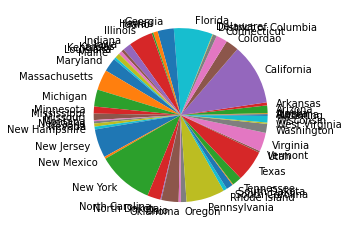

In [146]:
plt.pie(y_axis, labels=x_axis)
plt.show()

([<matplotlib.patches.Wedge at 0x7fb944c14ed0>,
 [Text(1.099983150805543, 0.0060883449237079616, 'Alabama'),
  Text(1.0998467076504455, 0.018363541882648625, 'Alaska'),
  Text(1.0975240302431841, 0.07376315502172223, 'Arizona'),
  Text(1.0907603284759915, 0.1422740518258594, 'Arkansas'),
  Text(1.1384392099110545, 0.6276592748753849, 'California'),
  Text(0.6520941853033784, 0.8858742424822631, 'Colordao'),
  Text(0.5203249715333882, 0.9691552631022435, 'Connecticut'),
  Text(0.4326654964677756, 1.01133603128055, 'District of Columbia'),
  Text(0.40603373322272174, 1.0223192297346362, 'Delaware'),
  Text(0.16184864125014292, 1.0880280406889717, 'Florida'),
  Text(-0.19051007016267066, 1.0833770872446096, 'Georgia'),
  Text(-0.32020749318434, 1.0523626567436726, 'Hawaii'),
  Text(-0.3575711120825947, 1.0402609767765092, 'Idaho'),
  Text(-0.508730437764588, 0.9752914137281486, 'Illinois'),
  Text(-0.6822416230694706, 0.862871002961355, 'Indiana'),
  Text(-0.7358486030150092, 0.8176349022

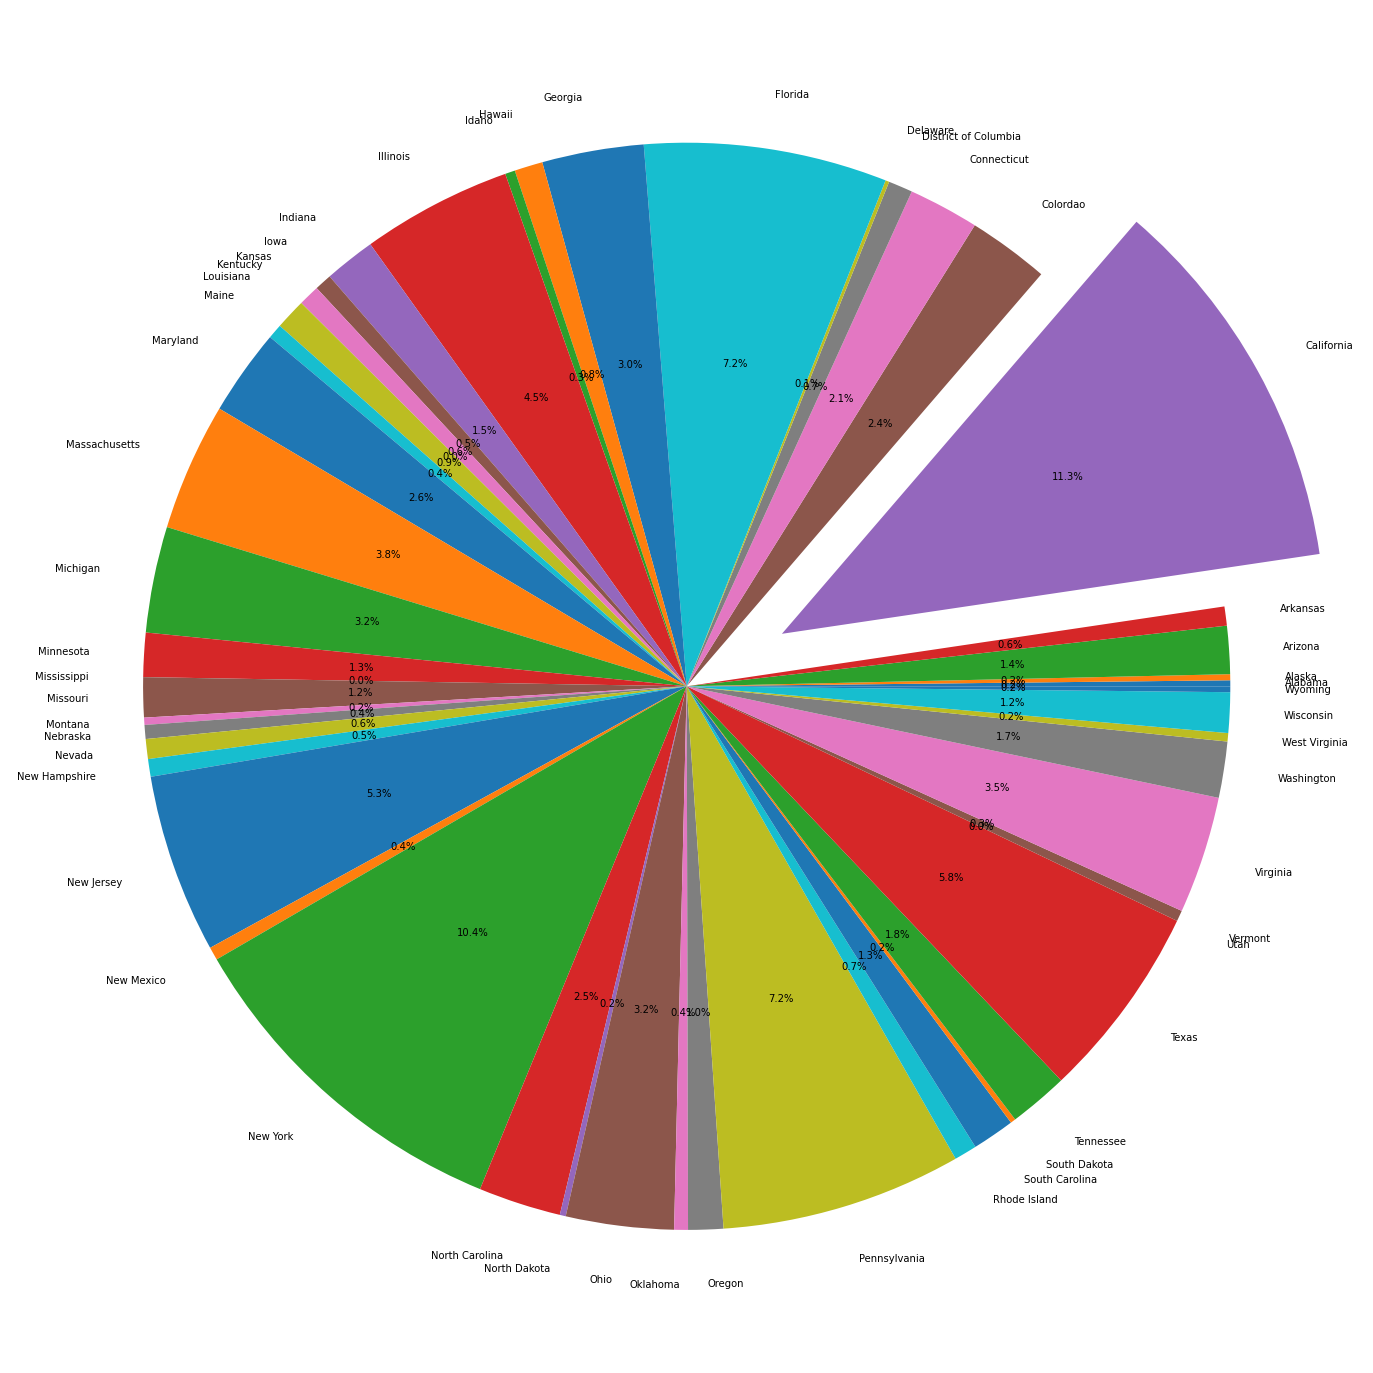

In [151]:
plt.subplots(figsize=(25, 25))
explode_values = (0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,)
plt.pie(y_axis, explode=explode_values, labels=x_axis, autopct='%.1f%%')